# ✅ Breast Cancer Detection - Version Améliorée avec MobileNetV2

In [1]:

import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


## 📁 Préparation du Dataset

In [2]:

data_dir = "C:/Users/Souad.ABOUD/Documents/LAB/breast-cancer-detector_Projet2/Dataset_BUSI_with_GT"  
img_size = (224, 224)
batch_size = 16

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    seed=42
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    seed=42
)


Found 1263 images belonging to 3 classes.
Found 315 images belonging to 3 classes.


## 🧠 Création du modèle MobileNetV2

In [3]:

base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
output = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,422,339 (9.24 MB)

 Trainable params: 164,355 (642.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

## ⚙️ Compilation et Entraînement

In [4]:

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator
)


c:\Users\Souad.ABOUD\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step - accuracy: 0.4852 - loss: 1.1014

c:\Users\Souad.ABOUD\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


79/79 ━━━━━━━━━━━━━━━━━━━━ 50s 599ms/step - accuracy: 0.4867 - loss: 1.0988 - val_accuracy: 0.7651 - val_loss: 0.5895
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 34s 434ms/step - accuracy: 0.7597 - loss: 0.6032 - val_accuracy: 0.7651 - val_loss: 0.5436
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 34s 430ms/step - accuracy: 0.7518 - loss: 0.5697 - val_accuracy: 0.7714 - val_loss: 0.4841
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 33s 418ms/step - accuracy: 0.8223 - loss: 0.4450 - val_accuracy: 0.8127 - val_loss: 0.4609
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 33s 421ms/step - accuracy: 0.8275 - loss: 0.4318 - val_accuracy: 0.8095 - val_loss: 0.4442
Epoch 6/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 45s 569ms/step - accuracy: 0.8405 - loss: 0.3918 - val_accuracy: 0.8032 - val_loss: 0.4503
Epoch 7/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 38s 481ms/step - accuracy: 0.8277 - loss: 0.3965 - val_accuracy: 0.8190 - val_loss: 0.4316
Epoch 8/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 33s 423ms/step - accuracy: 0.8327 - loss: 0.3916 - val_accuracy: 0.815

## 📊 Courbes d'apprentissage

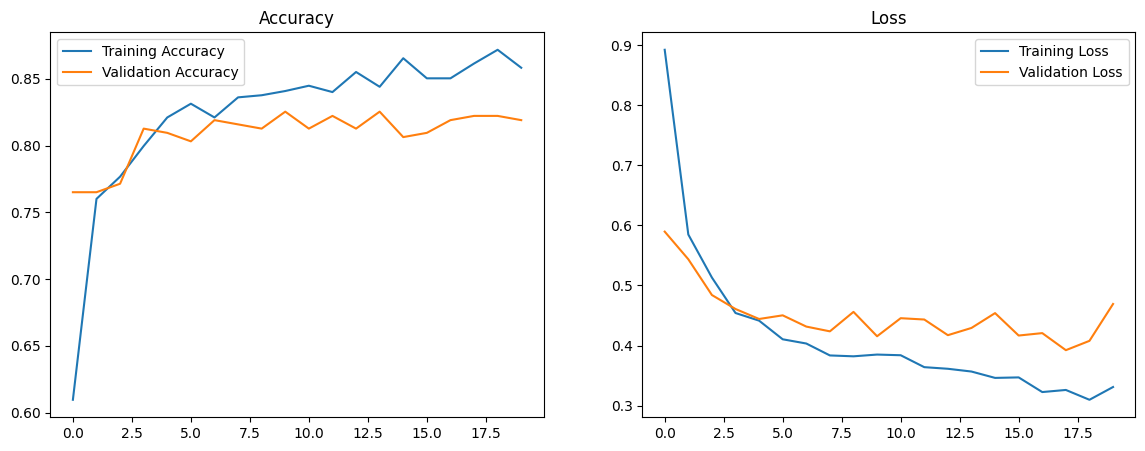

In [5]:

def plot_learning_curve(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.figure(figsize=(14,5))
    plt.subplot(1,2,1)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy')

    plt.subplot(1,2,2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.legend()
    plt.title('Loss')
    plt.show()

plot_learning_curve(history)


In [6]:

# 📁 Sauvegarde du modèle entraîné
model.save("C:/Users/Souad.ABOUD/Documents/LAB/breast-cancer-detector_Projet2/model/breast_cancer_model.h5")
print("✅ Modèle sauvegardé avec succès.")


✅ Modèle sauvegardé avec succès.


In [7]:

# 🔄 Chargement du modèle entraîné
from tensorflow.keras.models import load_model

model = load_model("C:/Users/Souad.ABOUD/Documents/LAB/breast-cancer-detector_Projet2/model/breast_cancer_model.h5")
print("✅ Modèle chargé avec succès.")


✅ Modèle chargé avec succès.


Found 1578 images belonging to 3 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


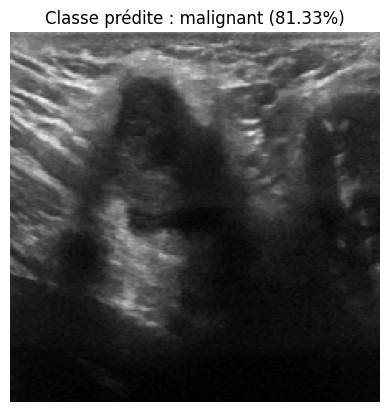

✅ Classe prédite : malignant
📊 Taux de cancer (confiance) : 81.33%


In [8]:

from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 🔁 Générateur pour récupérer les noms de classes
datagen = ImageDataGenerator(rescale=1./255)
temp_generator = datagen.flow_from_directory(
    "C:/Users/Souad.ABOUD/Documents/LAB/breast-cancer-detector_Projet2/Dataset_BUSI_with_GT",
    target_size=(224, 224),
    batch_size=1,
    class_mode='categorical'
)

class_indices = temp_generator.class_indices
labels = dict((v, k) for k, v in class_indices.items())

# 📷 Chargement d'une image à prédire
test_image_path = "C:/Users/Souad.ABOUD/Documents/LAB/breast-cancer-detector_Projet2/Dataset_BUSI_with_GT/malignant/malignant (203).png"
img = image.load_img(test_image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalisation

# 🔍 Prédiction
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)[0]
prediction_score = float(np.max(prediction)) * 100

# 📊 Résultat
plt.imshow(img)
plt.axis('off')
plt.title(f"Classe prédite : {labels[predicted_class]} ({prediction_score:.2f}%)")
plt.show()

print(f"✅ Classe prédite : {labels[predicted_class]}")
print(f"📊 Taux de cancer (confiance) : {prediction_score:.2f}%")
